In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 5.1.14 Функция $y=f(x)$ задана таблицей значений $y_0, y_1, \dots, y_n$ в точках $x_0, x_1, \dots, x_n$. Используя метод наименьших квадратов (МНК), найти многочлен $P_m(x)=a_0+a_1x+...+a_mx^m$ наилучшего среднеквадратичного приближения оптимальной степени $m=m^*$

In [2]:
x_1 = np.arange(-3, 2.5, 0.45)
y_1 = np.array([0.262, -1.032, -1.747, -1.981, -0.564, 0.774, 2.400, 2.131, 2.2, -0.393, -1.815, -0.788, 8.030])

In [15]:
np.sum(y_1*x_1**2)

21.968437500000075

In [26]:
mnk(x_1, y_1, x_1.shape[0], 2)

array([ 0.25423477,  0.84044289,  0.1959152 ])

In [24]:
-3.9*0.792+38.025*0.723

24.403275

In [27]:
sigma(x_1, y_1, mnk(x_1, y_1, x_1.shape[0], 2), x_1.shape[0], 2)

2.4496369447741504

In [16]:
def mnk(x, y, n, m):
    b = np.zeros(m+1)
    A = np.zeros((m+1, m+1))
    for j in range(m + 1):
        b[j] = np.sum(y * (x ** j))
        for k in range(m + 1):
            A[j, k] = np.sum(x ** (k + j))
    a = np.linalg.solve(A, b)
    return a

def P(a, m, t):
    p = 0
    for j in range(m+1):
        p += a[j] * (t ** j)
    return p

def sigma(x, y, a, n, m):
    d = 0
    for k in range(n):
        d += (P(a, m, x[k]) - y[k]) ** 2
    d = np.sqrt(d / (n - m))
    return d

In [29]:
sigmas = []
min_e = np.inf
m = 0
cur_e = sigma(x_1, y_1, mnk(x_1, y_1, x_1.shape[0], m), x_1.shape[0], m)
sigmas.append(cur_e)
while (cur_e < min_e) or (m < 10):
    min_e = cur_e
    m += 1
    cur_e = sigma(x_1, y_1, mnk(x_1, y_1, x_1.shape[0], m), x_1.shape[0], m)
    sigmas.append(cur_e)
print("σ = ", sigmas)

σ =  [2.6079532748927208, 2.4006760692116944, 2.4496369447741504, 2.4883048183313612, 1.2215766095523011, 0.29825441266303832, 0.30025682280195148, 0.32276731477495541, 0.35357323557163983, 0.38377246097987855, 0.40664855493958713]


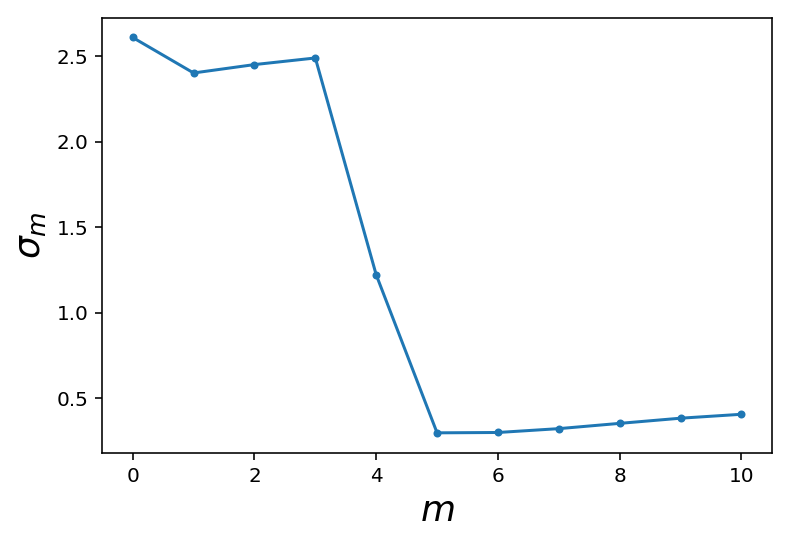

In [30]:
plt.plot(range(len(sigmas)), sigmas, '.-')
plt.ylabel('$\sigma_m$', size=18)
plt.xlabel('$m$', size=18)
plt.show()

In [32]:
m_s = np.argmin(sigmas)
print("m* = ", m_s)

m* =  5


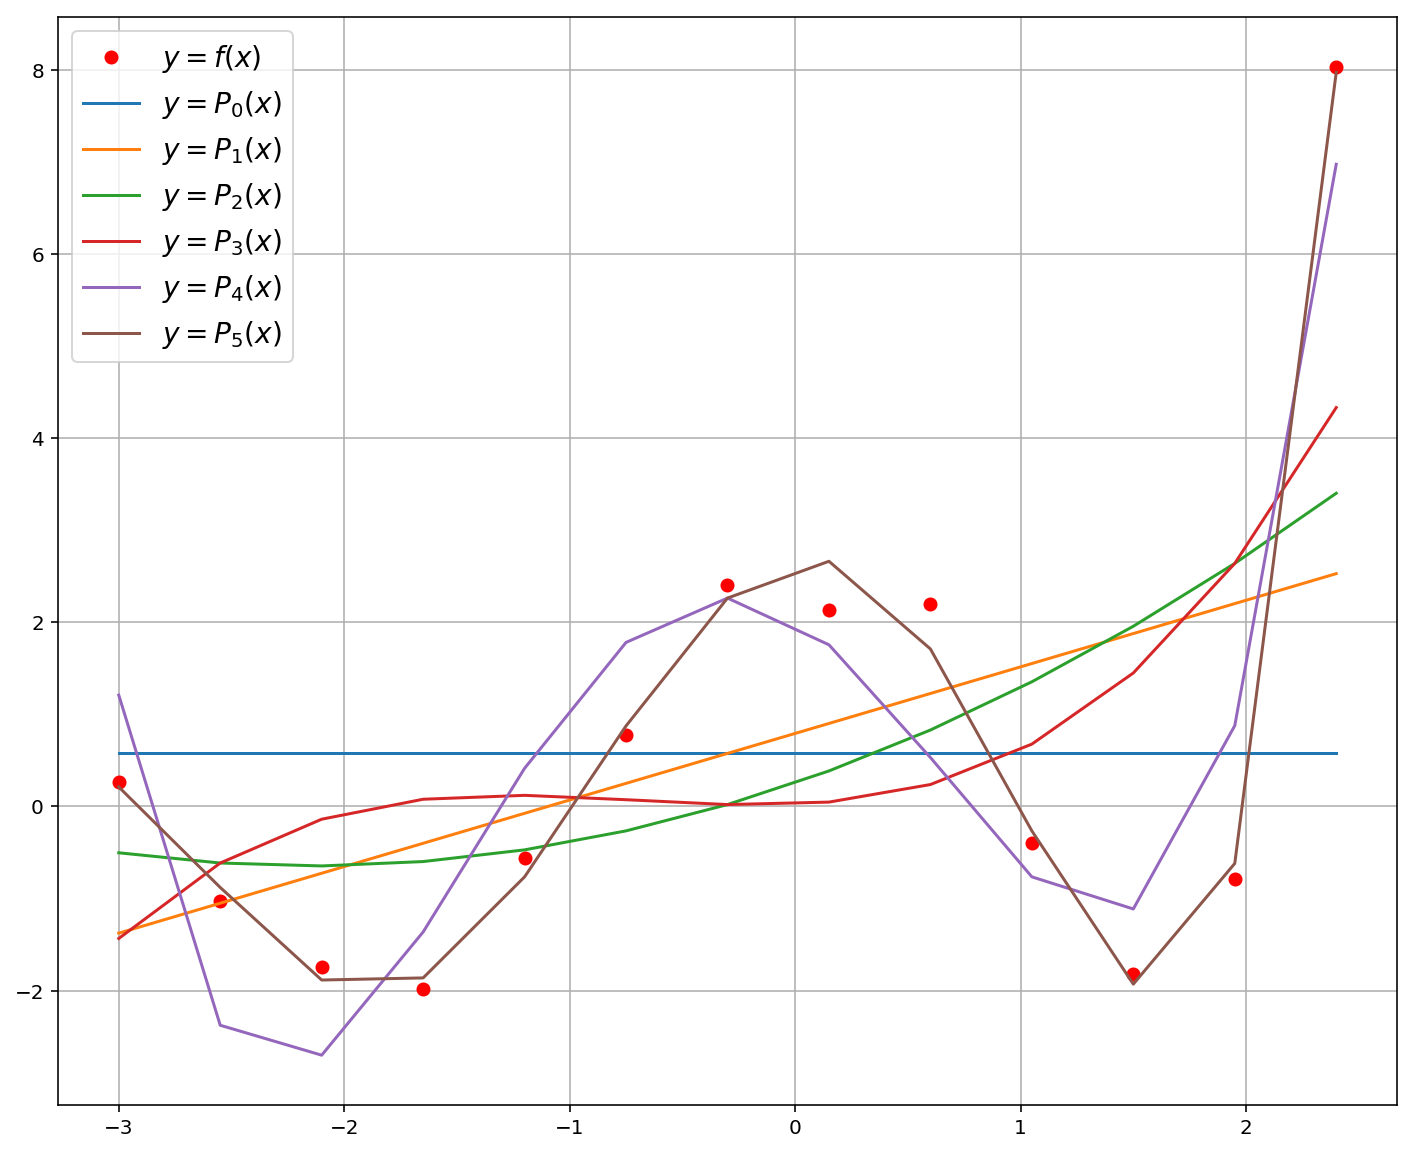

In [56]:
plt.figure(figsize=(12, 10))
plt.plot(x_1, y_1, 'or', label="$y=f(x)$")
for m in range(m_s +1):
    plt.plot(x_1, P(mnk(x_1, y_1, x_1.shape[0], m), m, x_1), label="$y=P_%d(x)$"%(m))
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

In [46]:
b_t = np.zeros(5+1)
A_t = np.zeros((5+1, 5+1))
for j in range(5 + 1):
    b_t[j] = np.sum(y_1 * (x_1 ** j))
    for k in range(5 + 1):
        A_t[j, k] = np.sum(x_1 ** (k + j))
print("Определитель матрицы: ", np.linalg.det(A_t))
print("Матрица не сингулярная.")

Определитель матрицы:  1.40080884594e+12
Матрица не сингулярная.


In [47]:
A_t

array([[  1.30000000e+01,  -3.90000000e+00,   3.80250000e+01,
         -3.35205000e+01,   2.06585438e+02,  -2.89850096e+02],
       [ -3.90000000e+00,   3.80250000e+01,  -3.35205000e+01,
          2.06585438e+02,  -2.89850096e+02,   1.37191273e+03],
       [  3.80250000e+01,  -3.35205000e+01,   2.06585438e+02,
         -2.89850096e+02,   1.37191273e+03,  -2.52084359e+03],
       [ -3.35205000e+01,   2.06585438e+02,  -2.89850096e+02,
          1.37191273e+03,  -2.52084359e+03,   1.01233159e+04],
       [  2.06585438e+02,  -2.89850096e+02,   1.37191273e+03,
         -2.52084359e+03,   1.01233159e+04,  -2.20425938e+04],
       [ -2.89850096e+02,   1.37191273e+03,  -2.52084359e+03,
          1.01233159e+04,  -2.20425938e+04,   7.96926407e+04]])

In [48]:
Q, R = np.linalg.qr(A_t)
a_t = np.dot(np.dot(np.linalg.inv(R), Q.T), b_t)
print("a = ", a_t)

a =  [ 2.67145287  0.43911563 -3.30940372 -0.56670697  0.59464492  0.14331733]


In [49]:
print("Погрешность при использовании QR-разложения матрицы по сравнению с обычным методом: ", np.max(np.abs(a_t - mnk(x_1, y_1, x_1.shape[0], 5))))

Погрешность при использовании QR-разложения матрицы по сравнению с обычным методом:  1.31006316906e-13


## 5.3.7  Зависимость между величинами $x$ и $y$ описывается функцией $y=f(x, a, b)$, где $a$ и $b$ – неизвестные параметры. Найти эти параметры, сведя исходную задачу к линейной задаче метода наименьших квадратов. 

### $\displaystyle y=a+b(x+2)^3$
### $\displaystyle (x+2)^3 = t$
### $\displaystyle y=a+bt$

In [50]:
x_2 = np.arange(-4, 4.1, 0.8)
y_2 = np.array([-6.47, -3.2086, -2.3433, -2.2767, -1.4114, 1.85, 9.105, 21.951, 41.986, 70.806, 110.01])
t_2 = (x_2 + 2) ** 3

In [55]:
for i in t_2:
    print(i)

-8.0
-1.728
-0.064
0.064
1.728
8.0
21.952
46.656
85.184
140.608
216.0


In [12]:
temp_2 = mnk(t_2, y_2, y_2.shape[0], 1)
print("a = ", temp_2[0], ", b = ", temp_2[1])

a =  -2.30999861625 , b =  0.519999970178


## 5.7.7  Дана кусочно-гладкая функция $y=f(x)$. Сравнить качество приближения функции кусочно-линейной и глобальной интерполяциями

In [2]:
a_7 = -5
b_7 = 5

def func_7(x):
    return x * (np.abs(x) - 4)

x_7 = np.linspace(a_7, b_7, num=51)
y_7 = func_7(x_7)
print("x = ", x_7)
print("\ny = ", y_7)

x =  [-5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2
 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8
  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8
  4.   4.2  4.4  4.6  4.8  5. ]

y =  [-5.   -3.84 -2.76 -1.76 -0.84 -0.    0.76  1.44  2.04  2.56  3.    3.36
  3.64  3.84  3.96  4.    3.96  3.84  3.64  3.36  3.    2.56  2.04  1.44
  0.76 -0.   -0.76 -1.44 -2.04 -2.56 -3.   -3.36 -3.64 -3.84 -3.96 -4.
 -3.96 -3.84 -3.64 -3.36 -3.   -2.56 -2.04 -1.44 -0.76  0.    0.84  1.76
  2.76  3.84  5.  ]


In [3]:
def lin_interp(x, y):
    int_x = np.array([])
    int_y = np.array([])
    for i in range(x.shape[0] - 1):
        b = (y[i] - y[i+1]) / (x[i] - x[i+1])
        a = y[i] - b*x[i]
        t_x = 0.2 * np.random.sample(3) + x[i]
        int_x = np.append(int_x, t_x)
        int_y = np.append(int_y, a + b * t_x)
    return int_y, int_x

In [4]:
intp_y, intp_x = lin_interp(x_7, y_7)

In [5]:
def new_interp(x, y, t):
    n = x.shape[0]
    f = np.zeros((n, n))
    f[:, 0] = y
    for k in range(1, n):
        for i in range(n-k):
            f[i, k] = (f[i+1, k-1] - f[i, k-1]) / (x[i+k] - x[i])
    s = y[0]
    r = 1
    for k in range(0, n - 1):
        r = r * (t - x[k])
        s += f[0, k + 1] * r
    return s

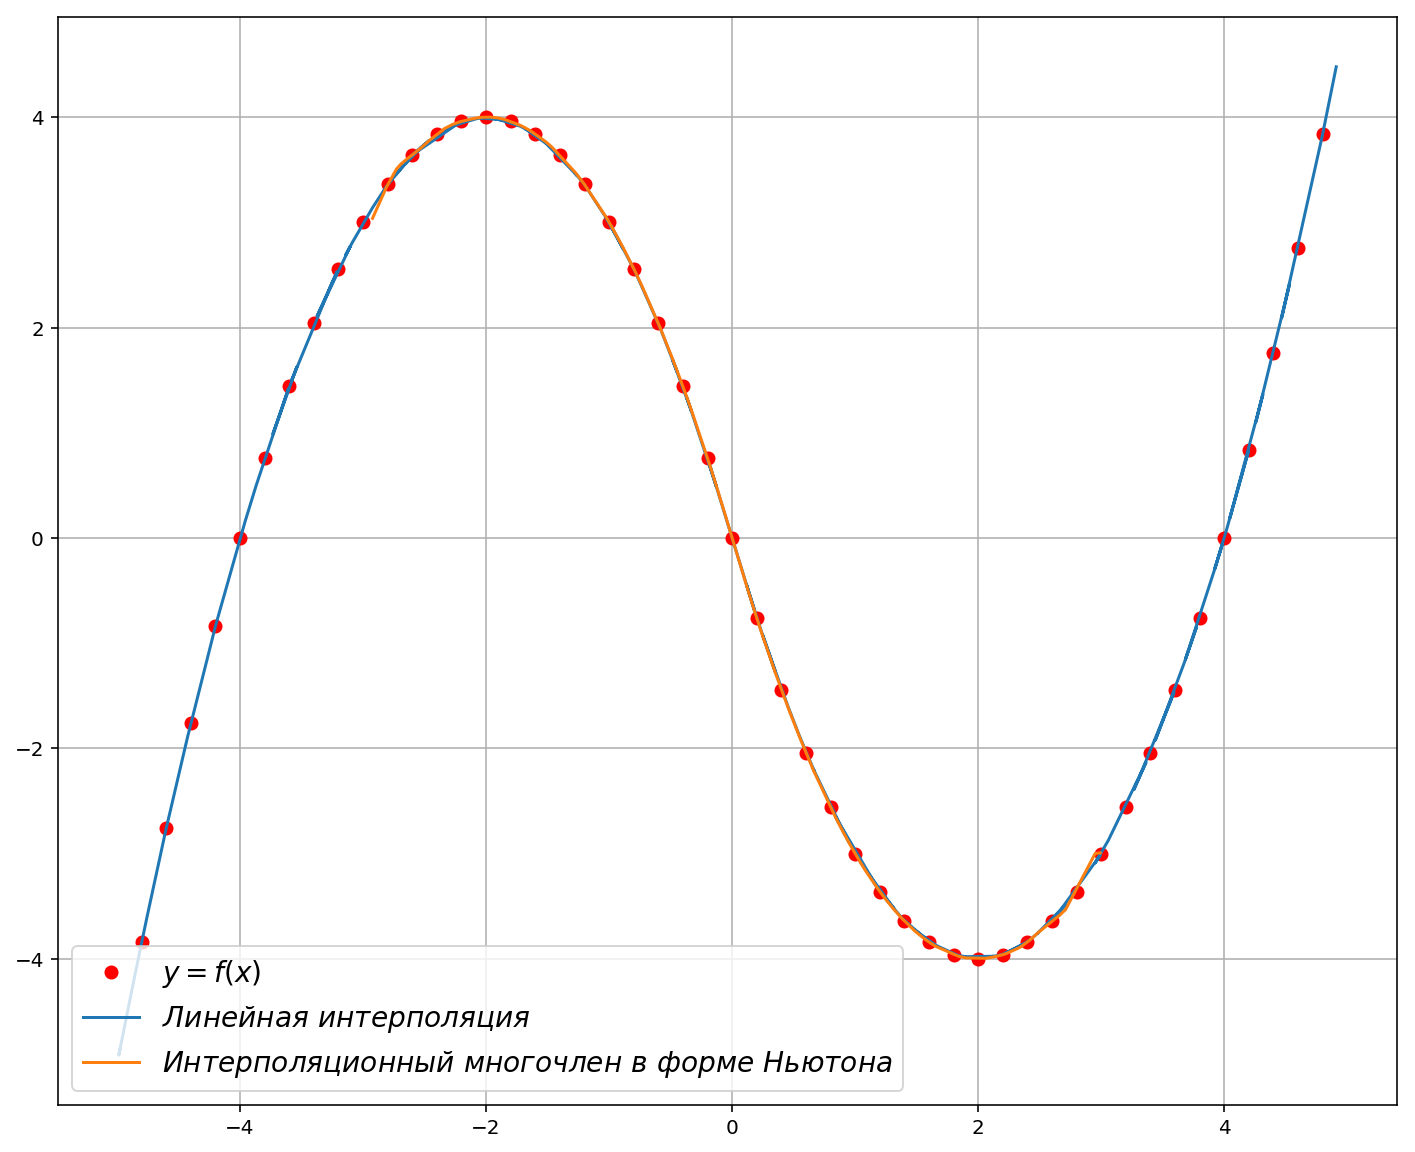

In [16]:
plt.figure(figsize=(12, 10))
plt.plot(x_7[1:-1], y_7[1:-1], 'or', label="$y=f(x)$")
plt.plot(intp_x, intp_y, label="$Линейная \ интерполяция$")
intp_x_s = np.sort(intp_x)
plt.plot(intp_x_s[30:-30], new_interp(x_7, y_7, intp_x_s)[30:-30], label="$Интерполяционный \ многочлен \ в \ форме \ Ньютона$")
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

/projects/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


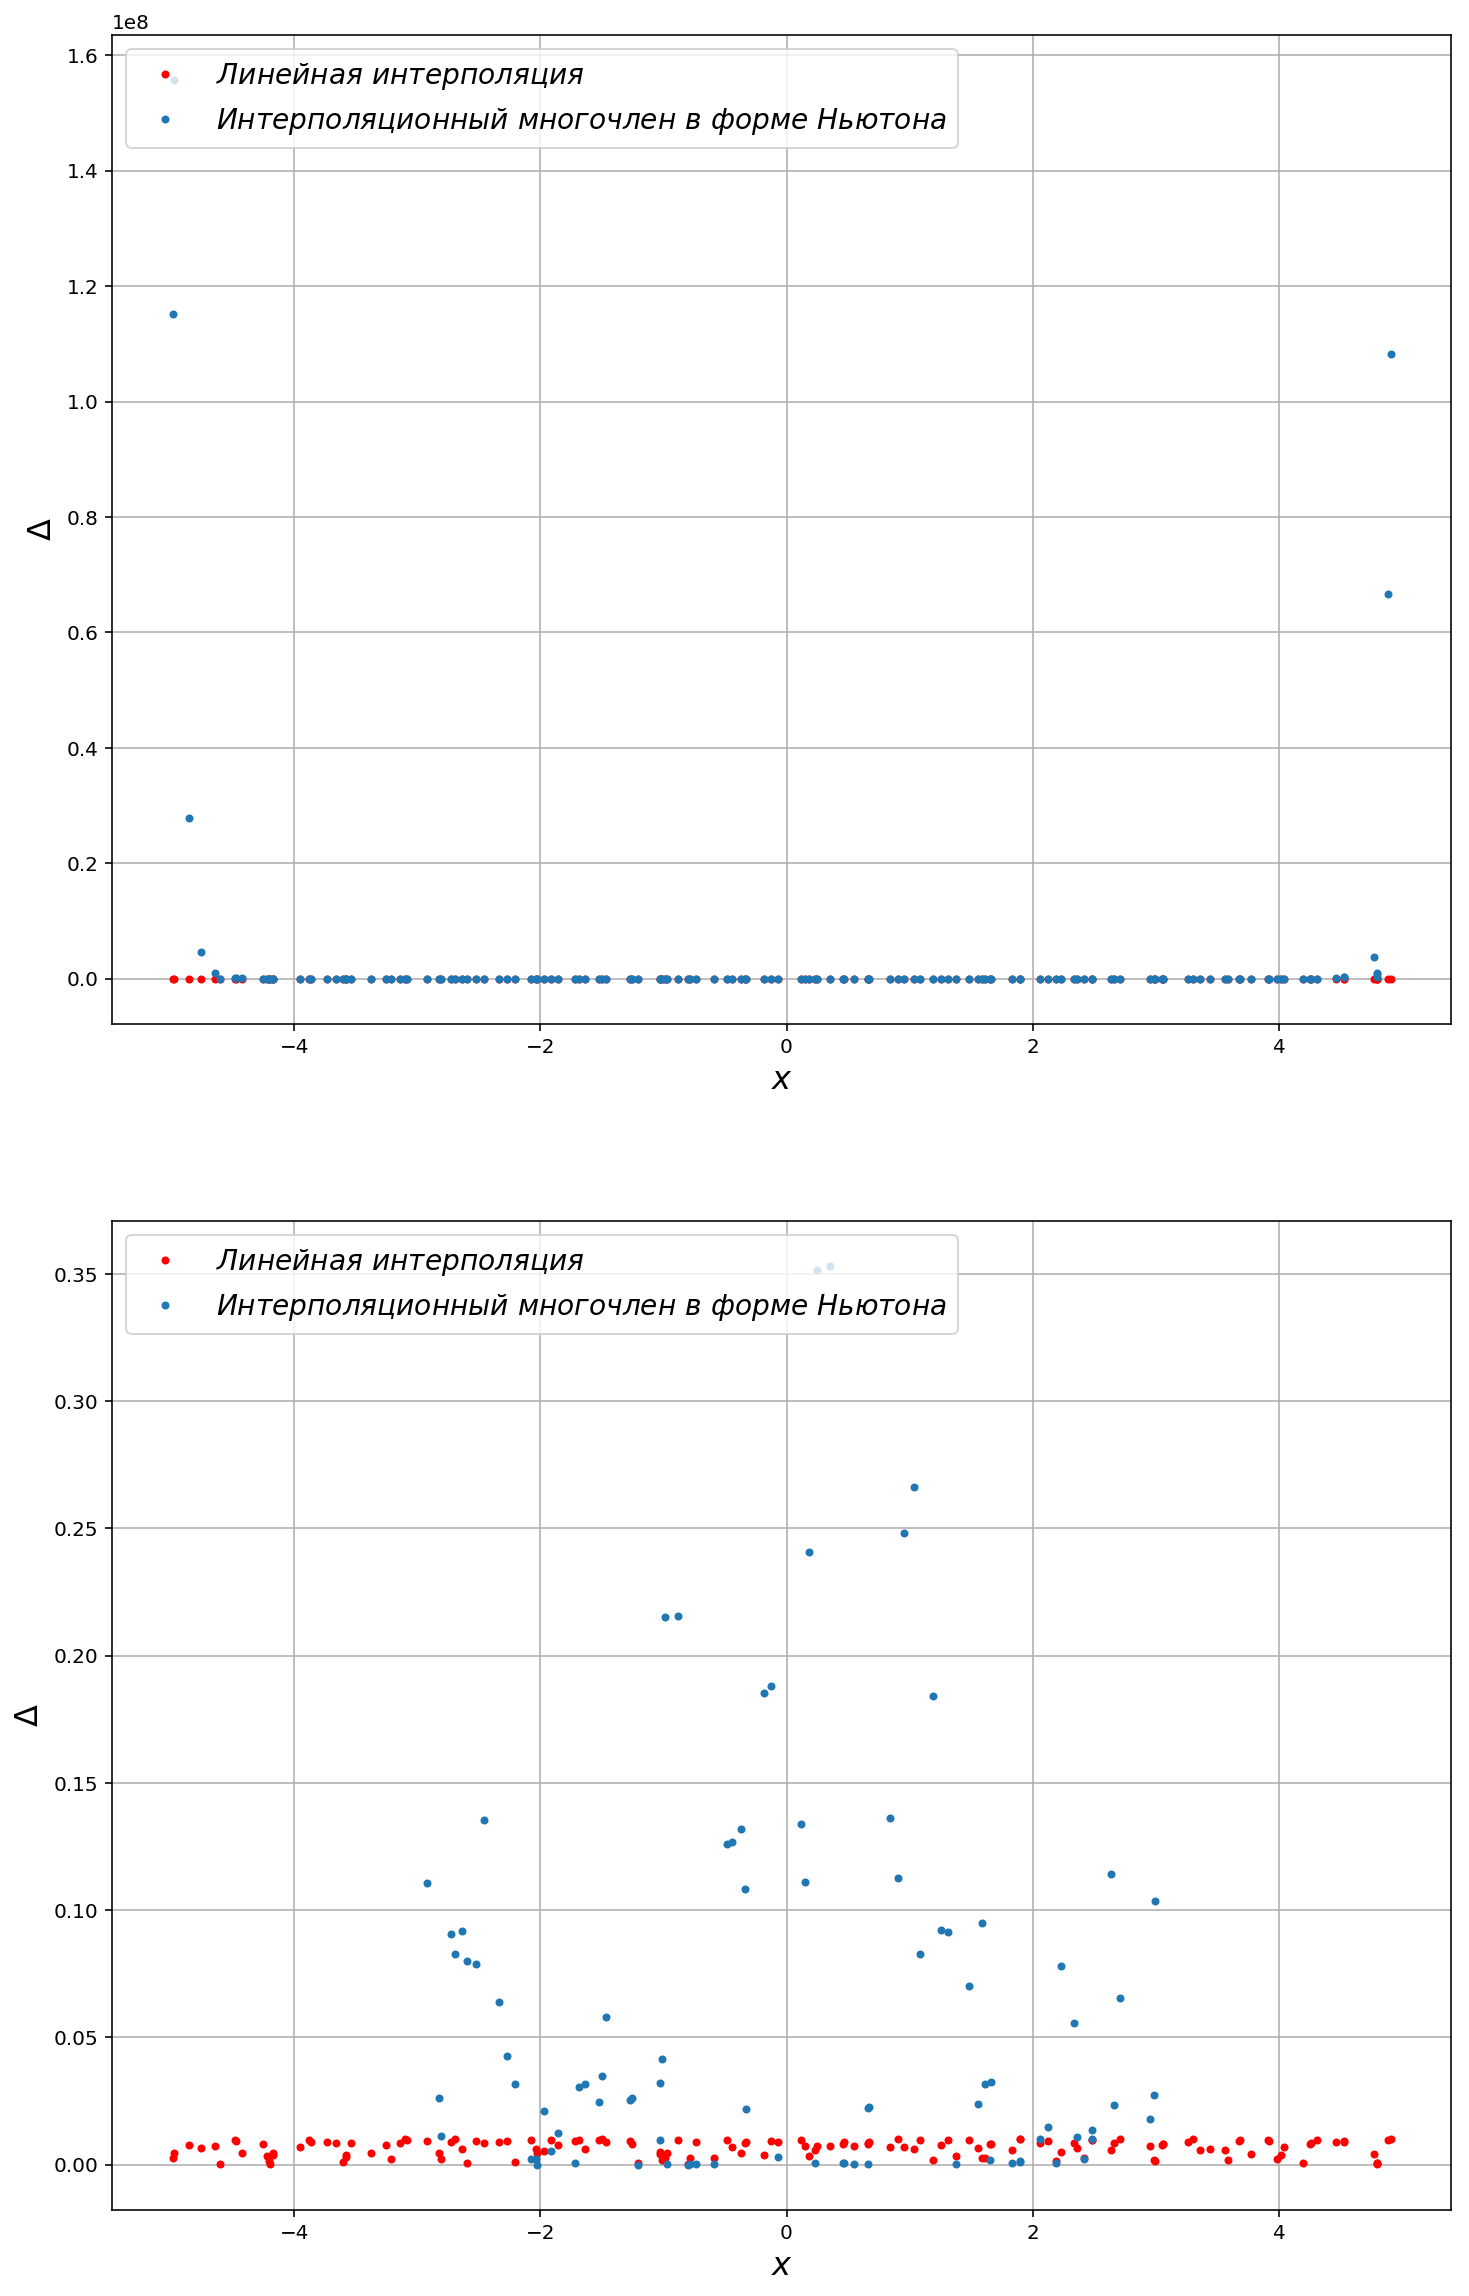

In [32]:
d_lin_int = np.abs(intp_y - func_7(intp_x))
d_new_int = np.abs(new_interp(x_7, y_7, intp_x_s) - func_7(intp_x))
fig, ax = plt.subplots(2, 1, figsize = (12, 20))
ax[0].plot(intp_x, d_lin_int, '.r', label="$Линейная \ интерполяция$")
ax[0].plot(intp_x_s, d_new_int, '.', label="$Интерполяционный \ многочлен \ в \ форме \ Ньютона$")
ax[0].legend(fontsize=14, loc=2)
ax[0].set_xlabel("$x$", size=16)
ax[0].set_ylabel("$\Delta$", size=16)
ax[1].plot(intp_x, d_lin_int, '.r', label="$Линейная \ интерполяция$")
ax[1].plot(intp_x_s[30:-30], d_new_int[30:-30], '.', label="$Интерполяционный \ многочлен \ в \ форме \ Ньютона$")
ax[1].legend(fontsize=14, loc=2)
ax[1].set_xlabel("$x$", size=16)
ax[1].set_ylabel("$\Delta$", size=16)
ax[0].grid(True)
ax[1].grid(True)

fig.show()

### Как видно по графикам, линейная интерполяция даёт лучшее приближение для заданной функции. Глобальная интерполяция в некоторых точках даёт большую погрешность, но в некоторых точках приближение имеет погрешность меньше, чем при линейной интерполяции. Такая погрешность в глобальной интерполяции объясняется неправильным выбором узлов интерполяции для данной функции.
### Вывод: глобальную интерполяцию выгодно использовать при определенных видах функций, к тому же, нужно правильно выбирать узлы интерполяции. При хорошем подборе параметров глобальная интерполяция даёт лучшее приближение функции на точках, не лежащих в исходном отрезке интерполяции, чем линейная.

## 5.9.7  Дана функция $y=f(x)$. Приблизить $f(x)$ на отрезке $[a, b]$ методом глобальной интерполяции и указанным в индивидуальном варианте сплайном (с отсутствием узла). На одном чертеже построить графики приближающей функции и функции $f(x)$. Сравнить качество приближения при разном количестве узлов интерполяции.

In [17]:
def interp_spline_nak(x, y, t):
    n = x.shape[0] - 1
    h = np.zeros(n)
    A = np.zeros((n + 1, n + 1))
    B = np.zeros(n + 1)
    s = np.zeros(n + 1)
    S = np.zeros(n)
    for i in range(n):
        h[i] = x[i + 1] - x[i]
    for i in range(1, n):
        A[i, i - 1] = h[i - 1] ** (-1)
        A[i, i] = 2 * (h[i - 1] ** (-1) + h[i] ** (-1))
        A[i, i + 1] = h[i] ** (-1)
        B[i] = 3 * (h[i - 1] ** (-2) * (y[i] - y[i - 1]) + h[i] ** (-2) * (y[i + 1] - y[i]))
    A[0, 0] = h[0] ** (-2)
    A[0, 1] = h[0] ** (-2) - h[1] ** (-2)
    A[0, 2] = -h[1] ** (-2)
    B[0] = - 2 * h[0] ** (-3) * (y[0] - y[1]) + 2 * h[1] ** (-3) * (y[1] - y[2])
    A[n, n - 2] = h[n - 2] ** (-2)
    A[n, n - 1] = h[n - 2] ** (-2) - h[n - 1] ** (-2)
    A[n, n] = -h[n - 1]  ** (-2)
    B[n] = - 2 * h[n - 2] ** (-3) * (y[n - 2] - y[n - 1]) + 2 * h[n - 1] ** (-3) * (y[n - 1] - y[n])
    s = np.linalg.solve(A, B)
    for i in range(1, n + 1):
        t_a = ((t - x[i]) ** 2) * (2 * (t - x[i - 1]) + h[i - 1]) * y[i - 1] * (h[i - 1] ** (-3))
        t_b = ((t - x[i - 1]) ** 2) * (2 * (x[i] - t) + h[i - 1]) * y[i] * (h[i - 1] ** (-3))
        t_c = ((t - x[i]) ** 2) * (t - x[i - 1]) * s[i - 1] * (h[i - 1] ** (-2))
        t_d = ((t - x[i - 1]) ** 2) * (t - x[i]) * s[i] * (h[i - 1] ** (-2))
        S[i - 1] = t_a + t_b + t_c + t_d
    return S

In [18]:
def func_9(x):
    return 8 * np.exp(x) * np.cos(x ** 2)

In [22]:
def my_plot_func(x, y, t, plot=True):
    plt_y = []
    for i in t:
        temp_y = interp_spline_nak(x, y, i)
        t_pos = np.argwhere((i < x_9) == True)
        if t_pos.shape[0]:
            plt_y.append(temp_y[t_pos[0, 0] - 1])
        else:
            plt_y.append(temp_y[-1])
    if plot:
        plt.figure(figsize=(12, 10))
        plt.plot(x, y, '*r', MarkerSize=14, label="$Узлы \ интерполяции$")
        plt.plot(t, plt_y, label="$S_3(x)$")
        plt.plot(t, func_9(t), label="$f(x)$")
        plt.legend(fontsize=14)
        plt.grid(True)
        plt.show()
    else:
        return plt_y

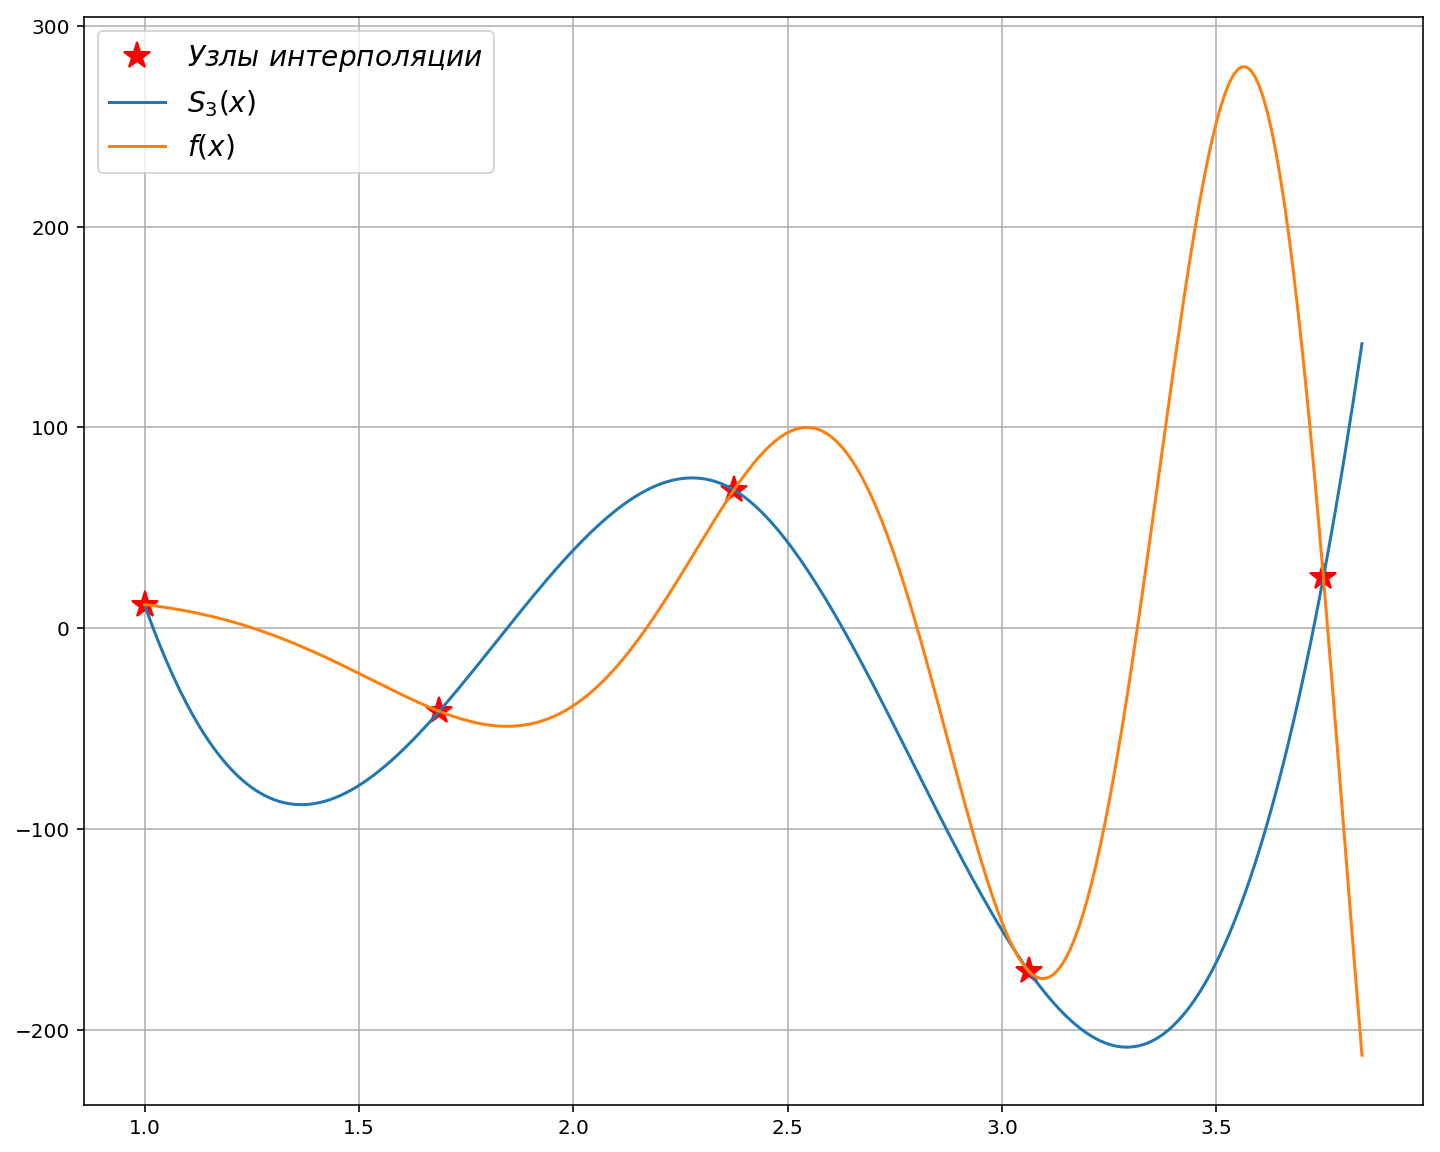

In [23]:
a_9 = 1
b_9 = 3.75
x_9 = np.linspace(a_9, b_9, 5)
y_9 = func_9(x_9)
t_a = np.arange(a_9, b_9 + 0.1, 0.01)
my_plot_func(x_9, y_9, t_a)

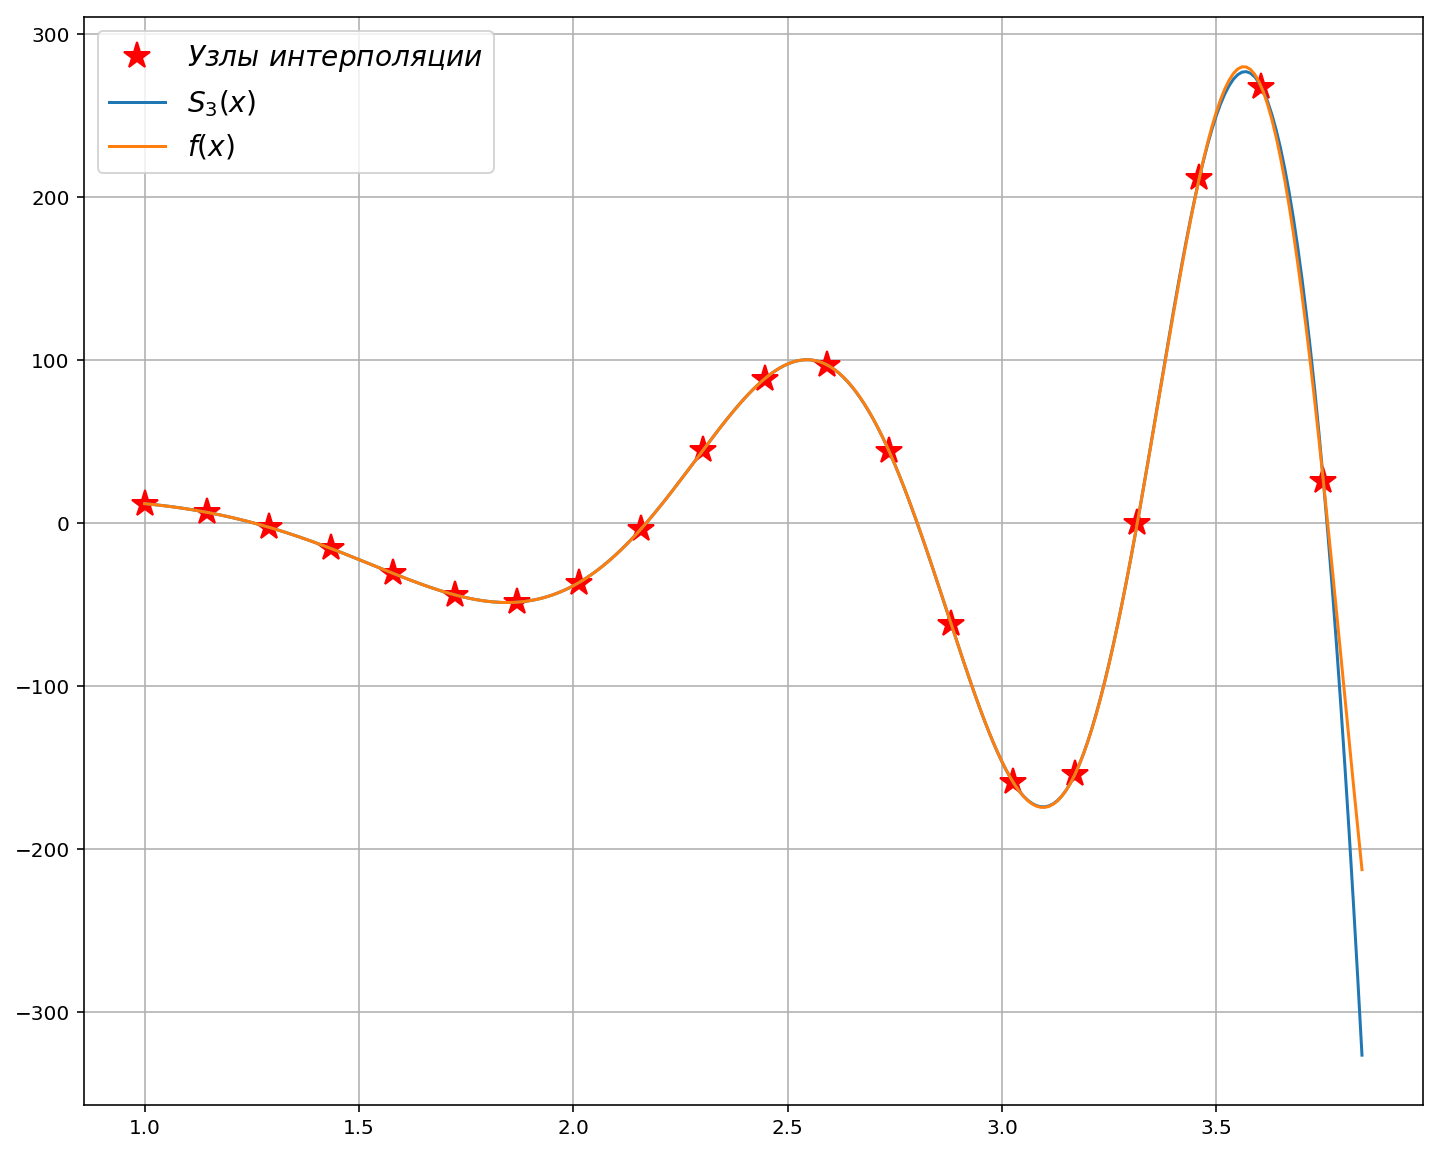

In [24]:
x_9 = np.linspace(a_9, b_9, 20)
y_9 = func_9(x_9)
t_a = np.arange(a_9, b_9 + 0.1, 0.01)
my_plot_func(x_9, y_9, t_a)

### При 5 узлах интерполяции построенная функция плохо приближает настоящую, в то время как 20-ти узлов хватает для хорошего приближения.

In [26]:
knots = range(4, 26)
deltas = []
for j in knots:
    x_9 = np.linspace(a_9, b_9, j)
    y_9 = func_9(x_9)
    t_a = np.arange(a_9, b_9 + 0.1, 0.01)
    intp_y_9 = my_plot_func(x_9, y_9, t_a, plot=False)
    deltas.append(np.linalg.norm(intp_y_9 - func_9(t_a)))

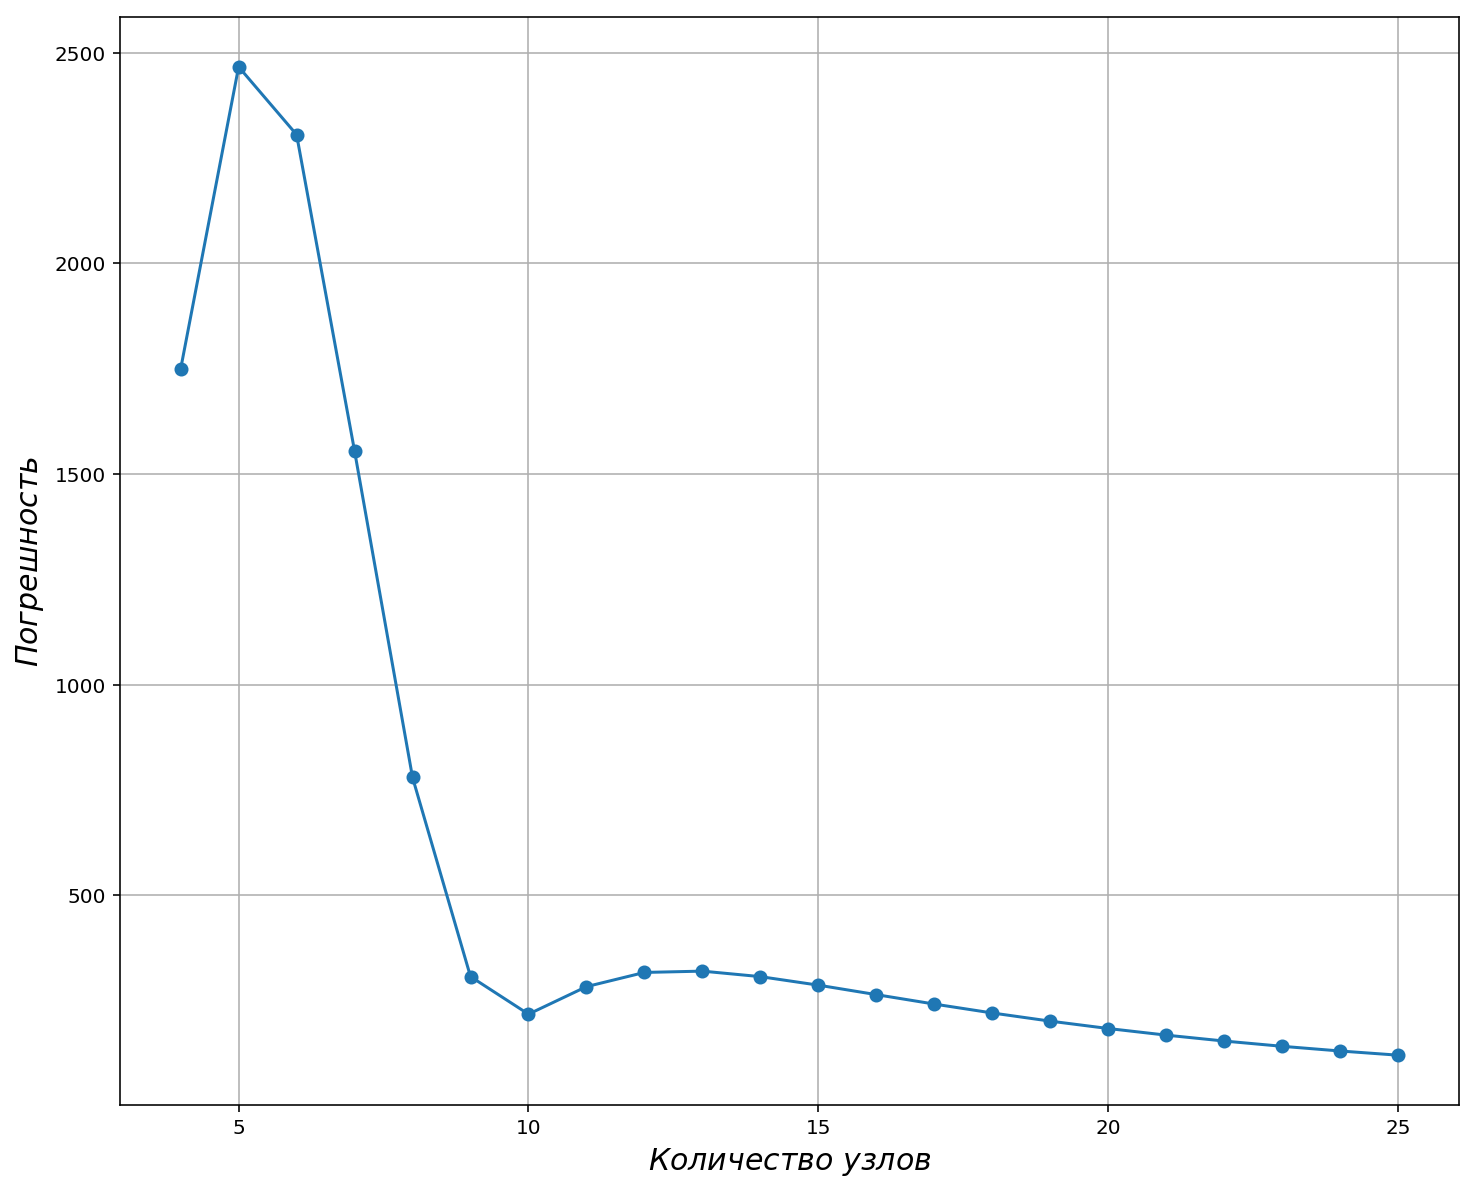

In [30]:
plt.figure(figsize = (12, 10))
plt.plot(knots, deltas, 'o-')
plt.xlabel("$Количество \ узлов$", size=15)
plt.ylabel("$Погрешность$", size=15)
plt.grid(True)
plt.show()

### Вывод: чем больше узлов берется, тем больше точность приближения функции, но тем больше вычислительных затрат.
#### * Погрешность считалась как евклидова норма разности вектора значений приближающей функции и исходной.